ANALISIS EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfAnimeDetails = pd.read_csv('../data/anime-dataset-2023.csv')
dfAnimeDetails.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [3]:
#Escogemos las columnas de nuestro interes
# Lista de columnas a eliminar
borrarColumnas = ['English name', 'Other name', 'Aired', 'Premiered', 'Status', 
                   'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 
                   'Rank', 'Scored By', 'Members', 'Image URL','Episodes']

# Eliminar las columnas
dfAnimeDetails = dfAnimeDetails.drop(columns=borrarColumnas)


In [4]:
dfAnimeDetails.info()
dfAnimeDetails.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anime_id    24905 non-null  int64 
 1   Name        24905 non-null  object
 2   Score       24905 non-null  object
 3   Genres      24905 non-null  object
 4   Synopsis    24905 non-null  object
 5   Type        24905 non-null  object
 6   Rating      24905 non-null  object
 7   Popularity  24905 non-null  int64 
 8   Favorites   24905 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


,anime_id,Name,Score,Genres,Synopsis,Type,Rating,Popularity,Favorites
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,R - 17+ (violence & profanity),43,78525
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,R - 17+ (violence & profanity),602,1448
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,PG-13 - Teens 13 or older,246,15035
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,PG-13 - Teens 13 or older,1795,613
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,PG - Children,5126,14


In [5]:
# Separar los géneros y crear una lista única
all_genres = dfAnimeDetails['Genres'].str.cat(sep=', ').split(', ')
unique_genres = set(all_genres)

# Contar cuántos géneros únicos hay
num_unique_genres = len(unique_genres)

print(f"Número de géneros únicos: {num_unique_genres}")
print("Géneros únicos:", unique_genres)
#Verificamos los valores unicos para cada variable de tipo object
print('Type: ' + str(dfAnimeDetails['Type'].unique()))
print('Rating: ' + str(dfAnimeDetails['Rating'].unique()))


Número de géneros únicos: 22
Géneros únicos: {'Drama', 'Fantasy', 'Action', 'Supernatural', 'Gourmet', 'Ecchi', 'Girls Love', 'Comedy', 'Award Winning', 'Boys Love', 'Adventure', 'UNKNOWN', 'Mystery', 'Sci-Fi', 'Horror', 'Slice of Life', 'Sports', 'Avant Garde', 'Suspense', 'Erotica', 'Hentai', 'Romance'}
Type: ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'UNKNOWN']
Rating: ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'PG - Children' 'R+ - Mild Nudity' 'G - All Ages' 'Rx - Hentai' 'UNKNOWN']


In [6]:
# Eliminar registros donde el género y typo es "UNKNOWN"
dfAnimeDetails = dfAnimeDetails[
    (dfAnimeDetails['Genres'] != 'UNKNOWN') &
    (dfAnimeDetails['Type'] != 'UNKNOWN') & (dfAnimeDetails['Rating'] != 'UNKNOWN')
]
dfAnimeDetails.info()
dfAnimeDetails.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19397 entries, 0 to 24902
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anime_id    19397 non-null  int64 
 1   Name        19397 non-null  object
 2   Score       19397 non-null  object
 3   Genres      19397 non-null  object
 4   Synopsis    19397 non-null  object
 5   Type        19397 non-null  object
 6   Rating      19397 non-null  object
 7   Popularity  19397 non-null  int64 
 8   Favorites   19397 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


,anime_id,Name,Score,Genres,Synopsis,Type,Rating,Popularity,Favorites
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,R - 17+ (violence & profanity),43,78525
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,R - 17+ (violence & profanity),602,1448
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,PG-13 - Teens 13 or older,246,15035
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,PG-13 - Teens 13 or older,1795,613
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,PG - Children,5126,14


In [7]:
#Cambiando score, popularity y favorites a numeros
# Convertir 'Score' a float 
dfAnimeDetails['Score'] = pd.to_numeric(dfAnimeDetails['Score'], errors='coerce')
dfAnimeDetails['Popularity'] = pd.to_numeric(dfAnimeDetails['Popularity'], errors='coerce')
dfAnimeDetails['Favorites'] = pd.to_numeric(dfAnimeDetails['Favorites'], errors='coerce')

# Verificar si hay valores nulos tras la conversión
print(dfAnimeDetails[['Score','Popularity','Favorites']].isnull().sum())

Score         5545
Popularity       0
Favorites        0
dtype: int64


In [8]:
# Contar valores nulos en Score donde Favorites > 100,000
na_count = dfAnimeDetails[(dfAnimeDetails['Score'].isna()) & (dfAnimeDetails['Favorites'] == 0)].shape[0]

print(f"Número de NAs en Score donde Favorites = 0: {na_count}")

Número de NAs en Score donde Favorites = 0: 4675


In [9]:
# Eliminar registros donde Score es nulo y Favorites es 0
dfAnimeDetails = dfAnimeDetails[
    ~((dfAnimeDetails['Score'].isna()) & (dfAnimeDetails['Favorites'] == 0))
]

In [10]:
# Contar registros por categoría de Rating
rating_counts = dfAnimeDetails['Rating'].value_counts()

print(rating_counts)

# Contar valores nulos en Score agrupados por Rating
na_counts = dfAnimeDetails[dfAnimeDetails['Score'].isna()].groupby('Rating').size()

print(na_counts)  

Rating
PG-13 - Teens 13 or older         6798
G - All Ages                      3097
Rx - Hentai                       1462
R - 17+ (violence & profanity)    1299
PG - Children                     1033
R+ - Mild Nudity                  1033
Name: count, dtype: int64
Rating
G - All Ages                      329
PG - Children                     101
PG-13 - Teens 13 or older         360
R - 17+ (violence & profanity)     58
R+ - Mild Nudity                   15
Rx - Hentai                         7
dtype: int64


In [11]:
# Calcular la mediana de Score por Rating
medianas = dfAnimeDetails.groupby('Rating')['Score'].median()

# Imputar los valores nulos en Score con la mediana correspondiente
for rating, mediana in medianas.items():
    dfAnimeDetails.loc[
        (dfAnimeDetails['Score'].isna()) & (dfAnimeDetails['Rating'] == rating), 
        'Score'
    ] = mediana

In [12]:
# Verificar si hay valores nulos tras la conversión
print(dfAnimeDetails[['Score','Popularity','Favorites']].isnull().sum())

Score         0
Popularity    0
Favorites     0
dtype: int64


In [13]:
dfUserScores = pd.read_csv('../data/users-score-2023.csv')
dfUserScores.info()
dfUserScores.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [14]:
#Eliminar de dfUserScores los animes_id que hemos eliminado en la limpieza
# Filtrar los datos de usuarios para mantener solo los que tienen anime_id en dfAnimeDetails
dfUserScores = dfUserScores[dfUserScores['anime_id'].isin(dfAnimeDetails['anime_id'])]
dfUserScores.info()
dfUserScores.head()


<class 'pandas.core.frame.DataFrame'>
Index: 24184513 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ GB


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [15]:
# Hacer el merge basado en anime_id
dfCombined = pd.merge(dfUserScores, dfAnimeDetails, on='anime_id', how='inner')
# Ordenar por user_id
dfCombined = dfCombined.sort_values(by='user_id').reset_index(drop=True)
# Cambiar el nombre de la columna
dfCombined = dfCombined.rename(columns={'rating': 'scoreByUser'})

dfCombined.head(10)

,user_id,Username,anime_id,Anime Title,scoreByUser,Name,Score,Genres,Synopsis,Type,Rating,Popularity,Favorites
0,1,Xinil,21,One Piece,9,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,PG-13 - Teens 13 or older,20,198986
1,1,Xinil,322,Paradise Kiss,8,Paradise Kiss,7.85,"Drama, Romance","On her way home from school, Yukari Hayasaka i...",TV,R - 17+ (violence & profanity),1051,4138
2,1,Xinil,161,Peace Maker Kurogane,8,Peace Maker Kurogane,7.30,"Action, Comedy",Although traumatized by witnessing the murder ...,TV,R - 17+ (violence & profanity),2723,276
3,1,Xinil,213,Pia Carrot e Youkoso!!,4,Pia Carrot e Youkoso!!,5.94,"Comedy, Hentai",Yusuke Kinoshita is forced by his father to wo...,OVA,Rx - Hentai,8947,3
4,1,Xinil,214,Pia Carrot e Youkoso!! 2,3,Pia Carrot e Youkoso!! 2,6.07,"Comedy, Romance, Hentai",Yusuke (from the first Pia Carrot series) retu...,OVA,Rx - Hentai,10014,5
5,1,Xinil,215,Pia Carrot e Youkoso!! 2 DX,5,Pia Carrot e Youkoso!! 2 DX,6.19,"Comedy, Romance","Kouji wants to work part-time, so, when he saw...",OVA,PG-13 - Teens 13 or older,9879,2
6,1,Xinil,329,Planetes,9,Planetes,8.26,"Award Winning, Drama, Romance, Sci-Fi","In 2075, space travel is no longer just a drea...",TV,PG-13 - Teens 13 or older,919,3836
7,1,Xinil,212,Project A-Ko,4,Project A-Ko,6.85,"Action, Adventure, Comedy, Sci-Fi",Sixteen years after its destruction by a meteo...,Movie,PG-13 - Teens 13 or older,4610,123
8,1,Xinil,211,Pure Mail,7,Pure Mail,6.17,Hentai,"Episode 1:\n""There is no need for relationship...",OVA,Rx - Hentai,8824,13
9,1,Xinil,208,R.O.D: Read or Die,8,R.O.D: Read or Die,7.63,"Action, Adventure, Mystery, Sci-Fi","Yomiko Readman is a lovable, near-sighted bibl...",OVA,PG-13 - Teens 13 or older,2513,332


In [16]:
dfCombined = dfCombined.drop(columns=['Genres', 'Synopsis', 'Popularity', 'Favorites','Name'])
dfCombined.head(20)

,user_id,Username,anime_id,Anime Title,scoreByUser,Score,Type,Rating
0,1,Xinil,21,One Piece,9,8.69,TV,PG-13 - Teens 13 or older
1,1,Xinil,322,Paradise Kiss,8,7.85,TV,R - 17+ (violence & profanity)
2,1,Xinil,161,Peace Maker Kurogane,8,7.30,TV,R - 17+ (violence & profanity)
3,1,Xinil,213,Pia Carrot e Youkoso!!,4,5.94,OVA,Rx - Hentai
4,1,Xinil,214,Pia Carrot e Youkoso!! 2,3,6.07,OVA,Rx - Hentai
5,1,Xinil,215,Pia Carrot e Youkoso!! 2 DX,5,6.19,OVA,PG-13 - Teens 13 or older
6,1,Xinil,329,Planetes,9,8.26,TV,PG-13 - Teens 13 or older
7,1,Xinil,212,Project A-Ko,4,6.85,Movie,PG-13 - Teens 13 or older
8,1,Xinil,211,Pure Mail,7,6.17,OVA,Rx - Hentai
9,1,Xinil,208,R.O.D: Read or Die,8,7.63,OVA,PG-13 - Teens 13 or older


In [17]:
dfCombined.to_csv('../data/dataresultados/dfUsuarioAnime_Final.csv', index=False)
dfAnimeDetails.to_csv('../data/dataresultados/dfAnimeDetails_final.csv', index=False)

In [18]:
# Contar visualizaciones y calcular el promedio de scoreByUser
anime_views_scores = dfCombined.groupby(['anime_id', 'Anime Title']) \
    .agg(meanScoredeUsuarios=('scoreByUser', 'mean'), views=('anime_id', 'count')) \
    .reset_index()

# Ordenar por número de visualizaciones y luego por el puntaje promedio
top_animes = anime_views_scores.sort_values(by=['views', 'meanScoredeUsuarios'], ascending=False)

# Seleccionar los 10 animes más vistos con mejor puntaje
top_10_animes = top_animes.head(10)

print(top_10_animes)

      anime_id                         Anime Title  meanScoredeUsuarios  \
1400      1535                          Death Note             8.721959   
1438      1575     Code Geass: Hangyaku no Lelouch             8.769046   
102        121                 Fullmetal Alchemist             8.396351   
247        269                              Bleach             7.795400   
10          20                              Naruto             7.571998   
204        226                          Elfen Lied             7.950153   
2640      2904  Code Geass: Hangyaku no Lelouch R2             8.894011   
3901      5114    Fullmetal Alchemist: Brotherhood             9.139213   
4510      6547                        Angel Beats!             8.372385   
178        199       Sen to Chihiro no Kamikakushi             8.881606   

       views  
1400  126492  
1438   96950  
102    93001  
247    90132  
10     89579  
204    87107  
2640   82329  
3901   76710  
4510   70360  
178    68880  


ANALISIS DE ANIMES DE ACUERDO AL SCORE DE USUARIO

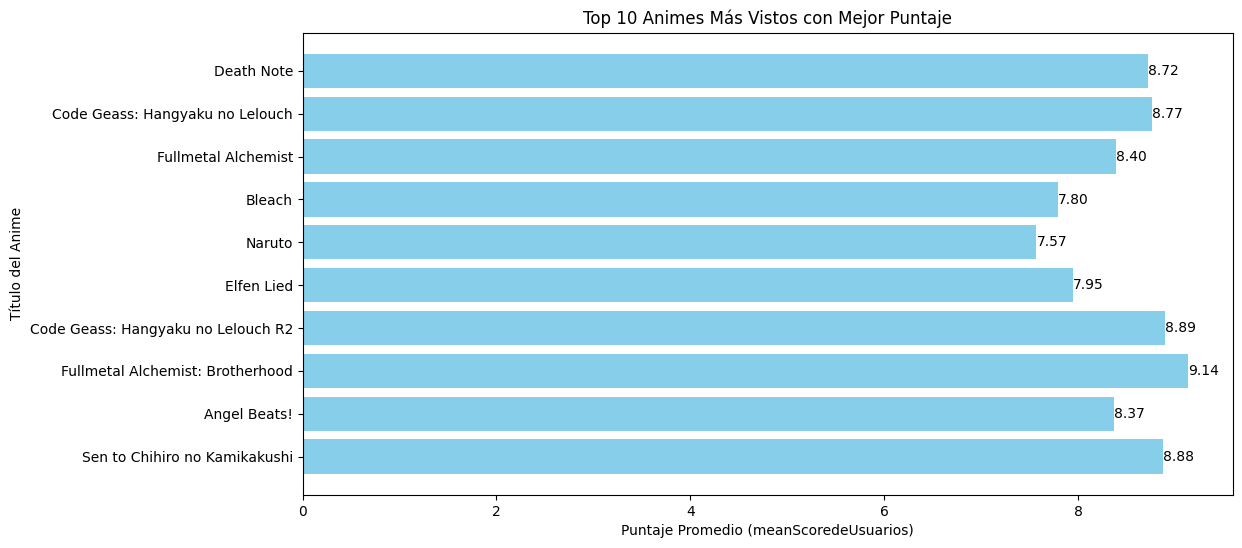

In [19]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_animes['Anime Title'], top_10_animes['meanScoredeUsuarios'], color='skyblue')

plt.xlabel('Puntaje Promedio (meanScoredeUsuarios)')
plt.ylabel('Título del Anime')
plt.title('Top 10 Animes Más Vistos con Mejor Puntaje')
plt.gca().invert_yaxis()  

# Agregar etiquetas con el puntaje promedio
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.show()

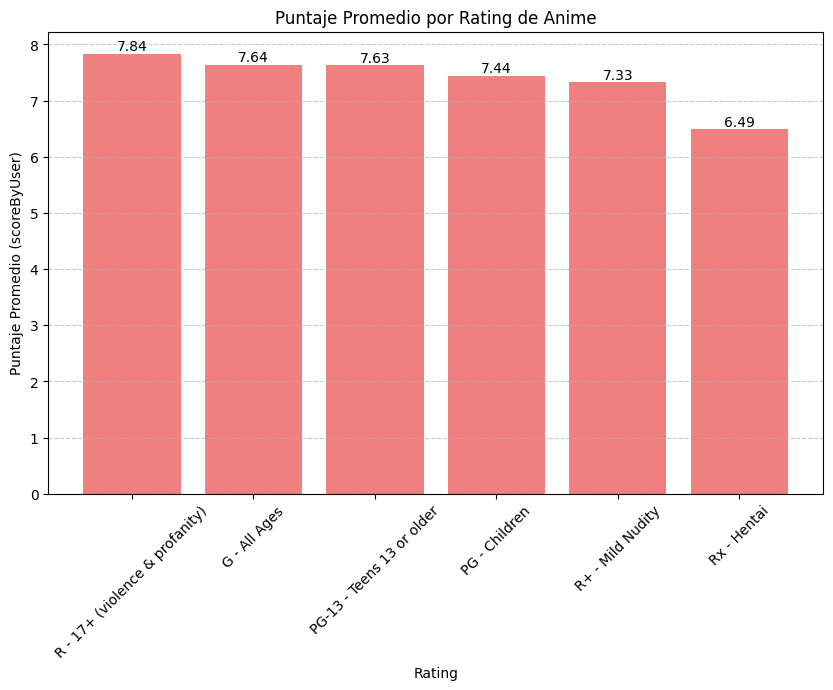

In [20]:
# Calcular el puntaje promedio por categoría de Rating
rating_scores = dfCombined.groupby('Rating')['scoreByUser'].mean().reset_index()

# Ordenar por el puntaje promedio
rating_scores = rating_scores.sort_values(by='scoreByUser', ascending=False)

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(rating_scores['Rating'], rating_scores['scoreByUser'], color='lightcoral')

plt.xlabel('Rating')
plt.ylabel('Puntaje Promedio (scoreByUser)')
plt.title('Puntaje Promedio por Rating de Anime')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas con el puntaje promedio
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

plt.show()

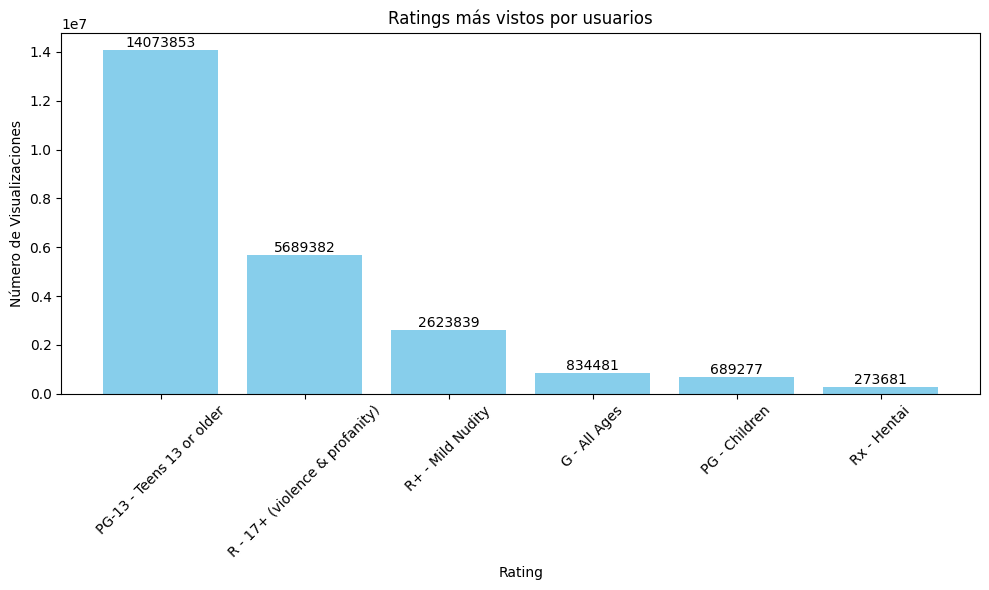

In [21]:
# Contar las visualizaciones por Rating
rating_views = dfCombined.groupby('Rating')['anime_id'].count().reset_index()

# Renombrar la columna para mayor claridad
rating_views.rename(columns={'anime_id': 'views'}, inplace=True)

# Ordenar por número de visualizaciones en orden descendente
rating_views = rating_views.sort_values(by='views', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_views['Rating'], rating_views['views'], color='skyblue')

# Agregar títulos y etiquetas
plt.title('Ratings más vistos por usuarios')
plt.xlabel('Rating')
plt.ylabel('Número de Visualizaciones')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Agregar etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom')  # Colocar la etiqueta en el centro de la barra

# Mostrar el gráfico
plt.tight_layout()
plt.show()

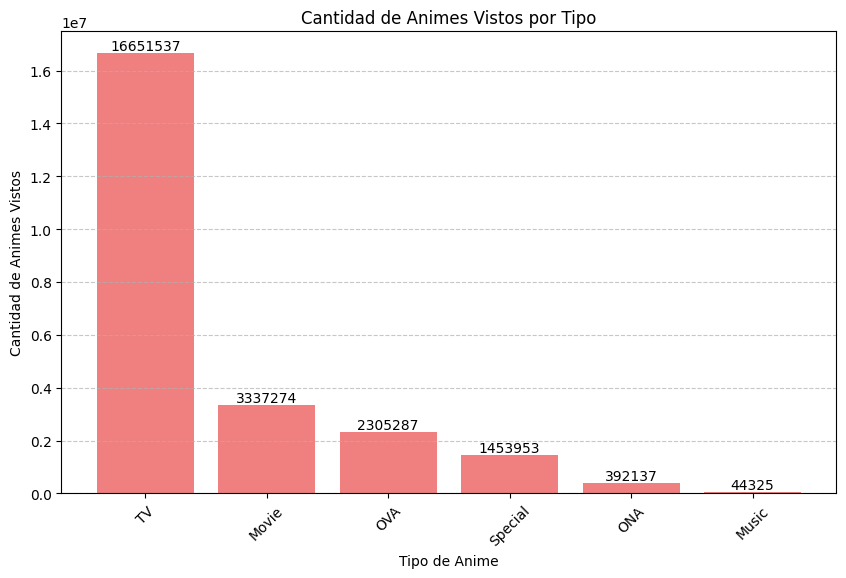

In [22]:
# Contar la cantidad de animes vistos por tipo
type_views = dfCombined.groupby('Type').size().reset_index(name='views')

# Ordenar por número de visualizaciones en orden descendente
type_views = type_views.sort_values(by='views', ascending=False)

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(type_views['Type'], type_views['views'], color='lightcoral')

plt.xlabel('Tipo de Anime')
plt.ylabel('Cantidad de Animes Vistos')
plt.title('Cantidad de Animes Vistos por Tipo')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas con la cantidad de animes vistos
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', 
             ha='center', va='bottom')

plt.show()

In [23]:
import pandas as pd

import pingouin as pg

# Crear grupos
grupo1 = dfCombined[(dfCombined['Rating'].isin(['PG-13 - Teens 13 or older', 'G - All Ages', 'PG - Children']))]['scoreByUser']
grupo2 = dfCombined[~dfCombined['Rating'].isin(['PG-13 - Teens 13 or older', 'G - All Ages', 'PG - Children'])]['scoreByUser']

# Ejecutar el T-test
resultado_ttest = pg.ttest(grupo1, grupo2)
# Obtener solo el p-valor
p_valor = resultado_ttest['p-val'].values[0]

print("P-valor:", p_valor)
# Pvalor menor a 0.05
## SI EXISTA DEPENDENCIA

P-valor: 3.158310460204425e-103


ANALISIS DE LA LISTA DE ANIME


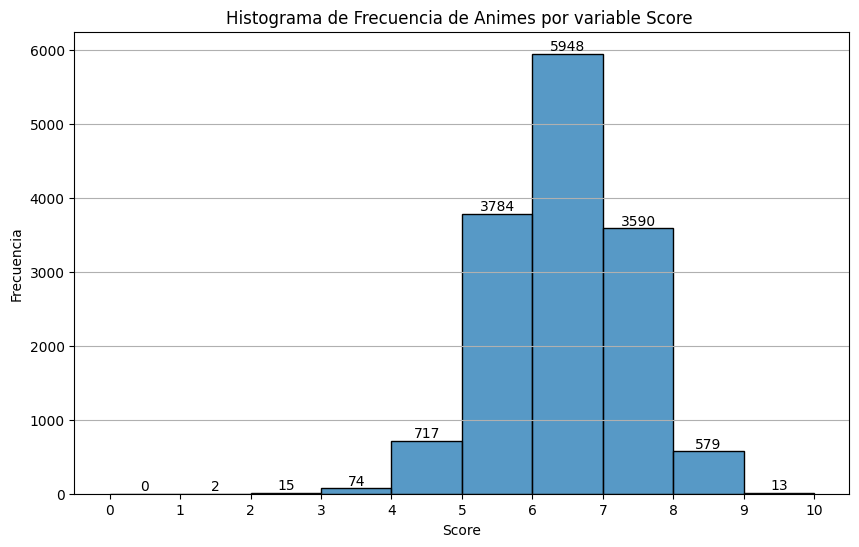

In [24]:
# Rangos
bins = [i for i in range(11)] 

# Crear el histograma
plt.figure(figsize=(10, 6))
ax = sns.histplot(dfAnimeDetails['Score'], bins=bins, kde=False, stat="count") 
plt.title('Histograma de Frecuencia de Animes por variable Score ')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.xticks(ticks=bins) 
plt.grid(axis='y')

# Añadir etiquetas de conteo en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


Type
TV         4615
OVA        3286
Movie      2446
ONA        1992
Special    1966
Music       417
Name: count, dtype: int64


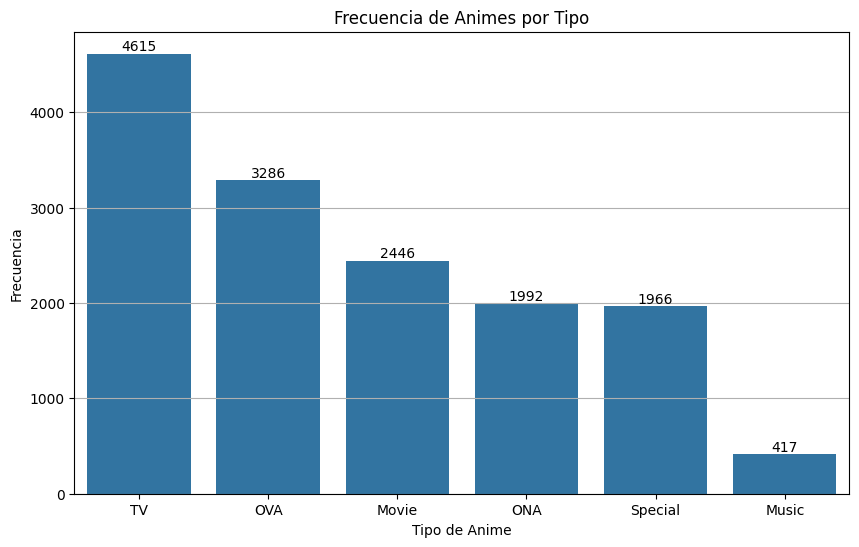

In [25]:
# Contar la frecuencia de animes por tipo
frecuencia_tipo = dfAnimeDetails['Type'].value_counts()

# Mostrar los resultados
print(frecuencia_tipo)

# Crear un gráfico de barras para visualizar la frecuencia
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frecuencia_tipo.index, y=frecuencia_tipo.values)
plt.title('Frecuencia de Animes por Tipo')
plt.xlabel('Tipo de Anime')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

# Agregar etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

Rating
PG-13 - Teens 13 or older         6798
G - All Ages                      3097
Rx - Hentai                       1462
R - 17+ (violence & profanity)    1299
PG - Children                     1033
R+ - Mild Nudity                  1033
Name: count, dtype: int64


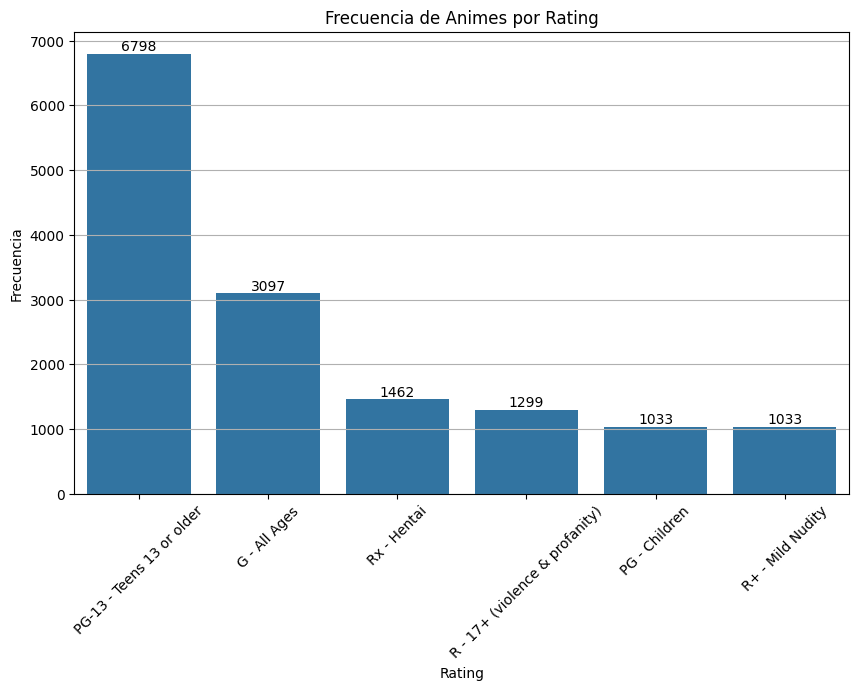

In [26]:
# Contar la frecuencia de animes por rating
frecuencia_rating = dfAnimeDetails['Rating'].value_counts()

# Mostrar los resultados
print(frecuencia_rating)

# Crear un gráfico de barras para visualizar la frecuencia
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frecuencia_rating.index, y=frecuencia_rating.values)
plt.title('Frecuencia de Animes por Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Agregar etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

                           Rating     Score
0                    G - All Ages  5.945221
1                   PG - Children  6.332817
2       PG-13 - Teens 13 or older  6.709975
3  R - 17+ (violence & profanity)  6.937090
4                R+ - Mild Nudity  6.231326
5                     Rx - Hentai  6.071347


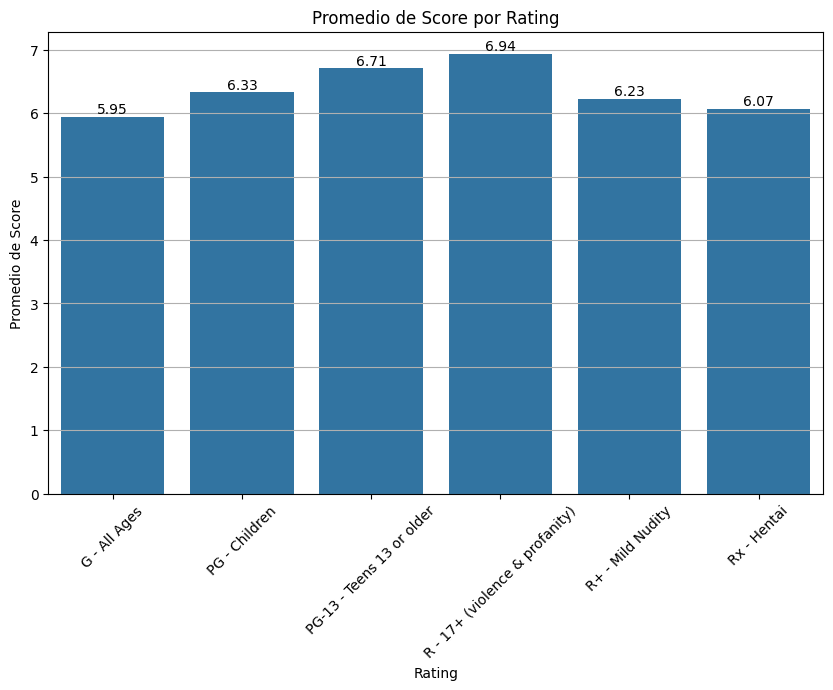

In [27]:
# Calcular el promedio de Score por Rating
promedio_score_rating = dfAnimeDetails.groupby('Rating')['Score'].mean().reset_index()

# Mostrar los resultados
print(promedio_score_rating)

# Crear un gráfico de barras para visualizar el promedio
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Score', data=promedio_score_rating)
plt.title('Promedio de Score por Rating')
plt.xlabel('Rating')
plt.ylabel('Promedio de Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Agregar etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

In [28]:
# Crear columnas para cada género
df_genres_dummies = dfAnimeDetails['Genres'].str.get_dummies(sep=', ')


## Unir las columnas de géneros al DataFrame original
#dfAnimeDetails = pd.concat([dfAnimeDetails, df_genres_dummies], axis=1)
dfAnimeGenres = pd.concat([dfAnimeDetails, df_genres_dummies], axis=1)


           Género  Promedio Score
2   Award Winning        7.292186
13        Mystery        6.985481
19       Suspense        6.967216
5           Drama        6.836174
14        Romance        6.802109
18   Supernatural        6.740992
17         Sports        6.699983
0       Adventure        6.661927
10        Gourmet        6.621622
9      Girls Love        6.592885
8         Fantasy        6.589588
15         Sci-Fi        6.561909
4          Comedy        6.511954
3       Boys Love        6.502774
16  Slice of Life        6.456729
6           Ecchi        6.433031
12         Horror        6.167429
7         Erotica        6.133556
11         Hentai        6.065734
1     Avant Garde        5.212470


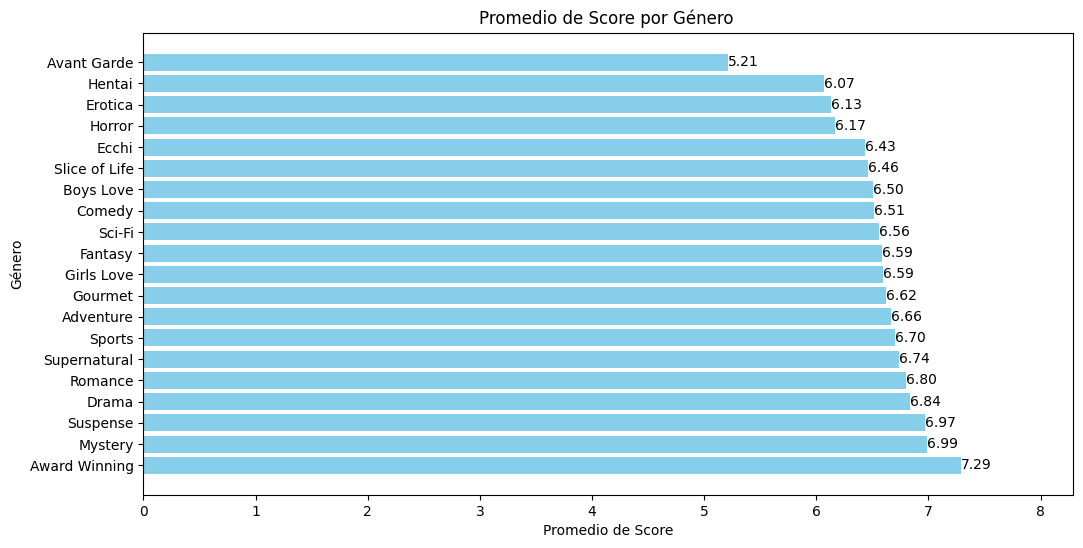

In [29]:
# Calcular el promedio de score por género
generos = dfAnimeGenres.columns[10:] 
promedio_scores = {}

for genero in generos:
    promedio_scores[genero] = dfAnimeGenres[dfAnimeGenres[genero] == 1]['Score'].mean()

# Convertir el diccionario a un DataFrame para mejor visualización
df_promedio_scores = pd.DataFrame(list(promedio_scores.items()), columns=['Género', 'Promedio Score'])
# Ordenar el DataFrame por Promedio Score de mayor a menor
df_promedio_scores = df_promedio_scores.sort_values(by='Promedio Score', ascending=False)

# Mostrar el resultado
print(df_promedio_scores)


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(df_promedio_scores['Género'], df_promedio_scores['Promedio Score'], color='skyblue')

# Agregar etiquetas a cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)

plt.title('Promedio de Score por Género ')
plt.xlabel('Promedio de Score')
plt.ylabel('Género')
plt.xlim(0, df_promedio_scores['Promedio Score'].max() + 1)  # Ajustar límite del eje x
plt.show()